## Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

In [8]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

You'll be working with the combined gdp and life expectancy data.

In [9]:
gdp_le = pd.read_csv('../data/gdp_le.csv').dropna()

In [10]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


Q1) Start by fitting a linear regression model with target being life expectancy and predictor variable year. 
- a. What coefficients do you get? Interpret the meaning of these coefficents.
- b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?
- c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?
- d. Plot the actual values against your model's estimates for the mean life expectancy.
- e. Inspect the R-squared value for the model. does it make sense, given the plot?

### **Question 1:** Start by fitting a linear regression model with target being life expectancy and predictor variable year.


a. What coefficients do you get? Interpret the meaning of these coefficents.

In [11]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     4149.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:30:36   Log-Likelihood:                -18608.
No. Observations:                5504   AIC:                         3.722e+04
Df Residuals:                    5502   BIC:                         3.723e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         63.5767      0.128    497.815      0.000      63.326      63.827
GDP_Per_Capita     0.0003   4.69e-06     64.411      0.000       0.000       0.000
==============================================================================
Omnibus:                      899.156   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1426.881
Skew:                          -1.132   Prob(JB):                    1.43e-310
Kurtosis:                       4.046   Cond. No.                     3.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ans: mean(life_expectancy) = 63.5767 + 0.0003 * GDP_Per_Capita

For every $1 increase in a nation's GDP_Per_Capita, its average life expectancy increases by 0.0003 years.  

### **Q1b**: Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [12]:
gdp_le_1990andOn = gdp_le[gdp_le['Year'] >= 1990].copy()
gdp_le_1990andOn

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


In [13]:
lm = smf.ols('Life_Expectancy ~ I(Year-1990)', data = gdp_le_1990andOn).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        20:30:36   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ans: For each year progressed since 1990, we see an increase of average life expectancy of 0.2677 years. Yes, this coefficient of 0.2677 is statistically significant, since we see its p-value < 0.05 

Ans: For each year progressed since 1990, we see an increase of average life expectancy of 0.2677 years. Yes, this coefficient of 0.2677 is statistically significant, since we see its p-value < 0.05 

### **Q1c**: Compare the actual mean life expectancy per year to the model's estimate. How well does it do?

In [14]:
MeanLifeExpectancy = gdp_le_1990andOn.groupby('Year').mean('Life_Expectancy').reset_index() 
MeanLifeExpectancy

,Year,GDP_Per_Capita,Life_Expectancy
0,1990,13196.952982,64.745253
1,1991,13233.479065,65.021276
2,1992,13491.014044,65.217845
3,1993,13590.337328,65.218031
4,1994,13717.686044,65.339539
5,1995,14084.477919,65.956224
6,1996,14379.581959,66.200189
7,1997,14817.373911,66.437280
8,1998,15088.809042,66.556082
9,1999,15414.445790,66.916176


In [15]:
lm = smf.ols('Life_Expectancy ~ I(Year-1990)', data = MeanLifeExpectancy).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.88e-26
Time:                        20:30:36   Log-Likelihood:                -18.371
No. Observations:                  33   AIC:                             40.74
Df Residuals:                      31   BIC:                             43.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6263      0.148    435.844      0.000      64.324      64.929
I(Year - 1990)     0.2677      0.008     33.616      0.000       0.251       0.284
==============================================================================
Omnibus:                       15.367   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.622
Skew:                          -1.337   Prob(JB):                     0.000149
Kurtosis:                       5.380   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ans for 1d

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

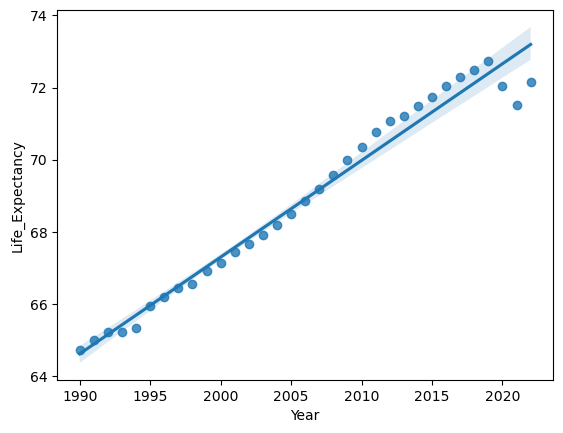

In [16]:
sns.regplot(x="Year", y="Life_Expectancy", data = MeanLifeExpectancy)

In [17]:
MeanLifeExpectancy['Year'].corr(MeanLifeExpectancy['Life_Expectancy'])

0.9865598907362619

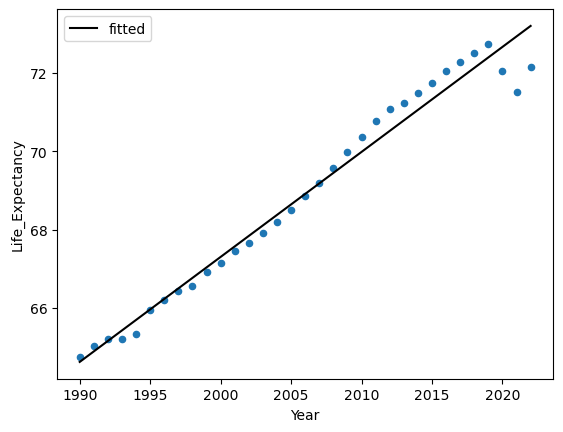

In [18]:
ax = MeanLifeExpectancy.plot(x = 'Year', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'Year': np.linspace(
        start = gdp_le_1990andOn['Year'].min(),
        stop = gdp_le_1990andOn['Year'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

**1c Ans:** fits very well. The regression line of fit can account for > 97% of the variations seen in the data. 

**1e Ans:** the adjust R-squared value = 0.972

### Q2: Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.

For this part, we'll look at our dataset just for the year 2021.

In [19]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021].copy()

Fit a linear regression model on the 2021 data with target variable life expenctancy and predictor variable GDP per capita.

In [20]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le_2021 ).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        20:30:37   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

mean(life_expectancy) = 65.9499 + 0.0003 * GDP_Per_Capita

### **Q2a:** What coefficients do you get? Interpret the meaning of those coefficients.

**2a Ans:** For every $1 increase in a nation's GDP_Per_Capita, its average life expectancy increases by 0.0003 years.  

### **Q2b:** Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

**2b Ans:** Coefficient increased by a factor of 1000. For every $1000 increase in GDP_Per_Capita, the average life expectancy increases by 0.2569 year (vs. 0.0002569 year). 

### **Q2c:** Are the coefficients statistically significant?

**2c Ans:** Yes, still statistically significant. p-value < 0.05

***Instruction:*** It might make it easier to interpret if we changed the units on GDP_Per_Capita since a one unit change in GDP per capita does not have a very large impact at all on GDP_Per_Capita.

Fit a new model, but this time use thousands of dollars of GDP_Per_Capita as your predictor variable.

**Hint:** Two ways that you can accomplish this are by creating a new column in your DataFrame or by making use of `I()` in your formula.

In [21]:
lm = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data = gdp_le_2021).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        20:30:37   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***mean(life_expectancy) = 65.9499 + 0.2569 * (GDP_Per_Capita/1000)***

### **Q2d:** What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000?

**2d Ans:** According to the model's estimate, the mean life expectancy for a country whose GDP Per Capita is $50k is expected to be 78.7949 years. By the same token, the mean life expectancy for a country whose GDP Per Capita is $100k is expected to be 91.6399 years. 

### **Q2e:** Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

Now, let's plot the fitted values against the original data.

**2e Ans:**  Using Log might result a better fit. Scatter plot shows a curve covering a large span of GDP Per Capita.

# Q3: Now, fit a model for life expectancy based on the log of gdp per capita.

### Q3a: Inspect the coefficients for this model. Are they statistically significant? 

Q3 Ans: Coefficient for this model = 5.5890. Yes, statistically significant, as its p-value < 0.05. 

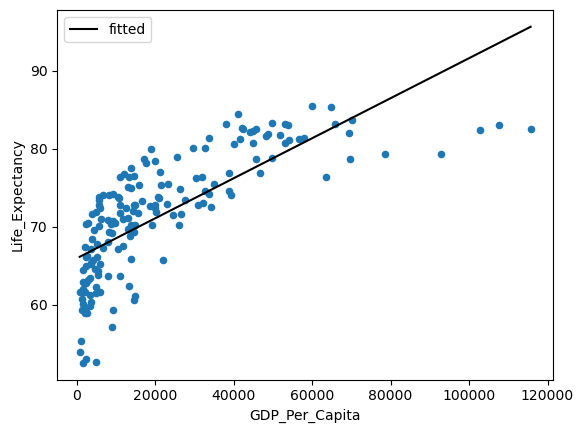

In [22]:
ax = gdp_le_2021.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2021['GDP_Per_Capita'].min(),
        stop = gdp_le_2021['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

You saw from the guided exploration portion of the project that using the logarithm of the GDP resulted in a larger correlation value. 

Fit a new model using the log of GDP Per Capita as a predictor variable.

**Hint:** You can do this by using `'Life_Expectancy ~ np.log(GDP_Per_Capita)'` as your formula.

In [23]:
lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le_2021).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        20:30:37   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18.9470      2.547      7.438      0.000      13.919      23.975
np.log(GDP_Per_Capita)     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q3b: Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000? 

**3b Ans:** 

mean(life_expectancy) = 21.7086 + 5.5890*log(GDP_Per_Capita)

For every 1 unit increase in the log of GDP per Capita, life expectancy increases by 5.5890 years.

To increase the natural log by 1, we will need to multiply by e (2.718...).

According to the model's estimate, the mean life expectancy for a country whose GDP Per Capita is $50k is expected to be 47.97 years. By the same token, the mean life expectancy for a country whose GDP Per Capita is $100k is expected to be 49.65 years. 

### Q3c: Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

**3c Ans:** Log Linear Regression gave a much better fit, as evidenced by its much higher Adjusted R^2 value of 0.715 (vs. 0.553)

Let's look at the plot of our fitted vales agains the data.

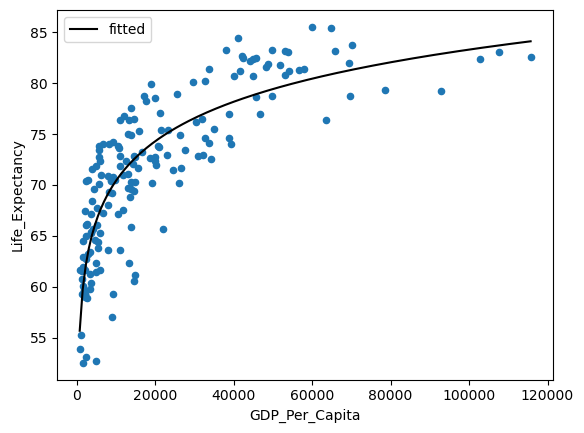

In [24]:
ax = gdp_le_2021.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2021['GDP_Per_Capita'].min(),
        stop = gdp_le_2021['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

We can plot with GDP Per Capita presented on a log scale.

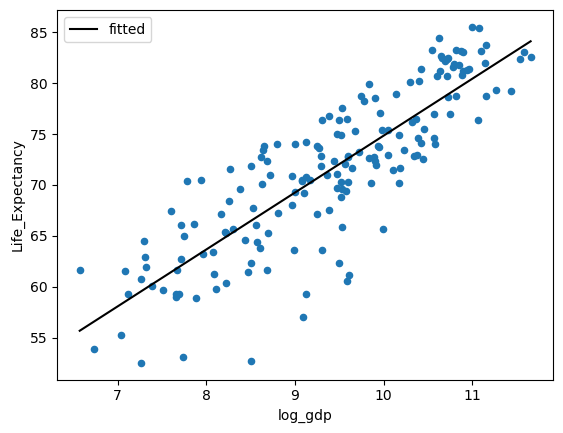

In [25]:
gdp_le_2021['log_gdp'] = np.log(gdp_le_2021['GDP_Per_Capita'])

ax = gdp_le_2021.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2021['GDP_Per_Capita'].min(),
        stop = gdp_le_2021['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

# Q4: Finally, return to the full dataset.

## Q4a: First, fit a linear regression model for life expectancy based on the log of gdp per capita. 

Now, let's explore the relationship between health and wealth over time.

First, using all data in gdp_le, fit a model for life expectancy based on number of years since 1990. (Hint: make use of I()) to help with this.

In [50]:
lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:38:06   Log-Likelihood:                -16834.
No. Observations:                5504   AIC:                         3.367e+04
Df Residuals:                    5502   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.1941      0.532     17.297      0.000       8.152      10.236
np.log(GDP_Per_Capita)     6.5311      0.058    113.506      0.000       6.418       6.644
==============================================================================
Omnibus:                     1066.762   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.301
Skew:                          -1.108   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q4b: Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

**4b Ans:** Since 1990, each year progressed is associated with an increase of 0.5932 year in life expectancy. Weaknesses of this model include not accounting for other more pertinent or influential variables, some of which can be confounding variables.

In [51]:
lm_gdp_cont_year = smf.ols('Life_Expectancy ~ I(Year - 1990) + np.log(GDP_Per_Capita) + np.log(GDP_Per_Capita):I(Year - 1990)', data = gdp_le).fit()
lm_gdp_cont_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     4759.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:44:54   Log-Likelihood:                -16632.
No. Observations:                5504   AIC:                         3.327e+04
Df Residuals:                    5500   BIC:                         3.330e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.2785      1.005      1.272      0.204      -0.693       3.250
I(Year - 1990)                            0.5932      0.055     10.801      0.000       0.486       0.701
np.log(GDP_Per_Capita)                    7.1673      0.111     64.511      0.000       6.949       7.385
np.log(GDP_Per_Capita):I(Year - 1990)    -0.0502      0.006     -8.426      0.000      -0.062      -0.039
==============================================================================
Omnibus:                     1084.360   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2613.661
Skew:                          -1.095   Prob(JB):                         0.00
Kurtosis:                       5.568   Cond. No.                     2.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""